<a href="https://colab.research.google.com/github/Shettyrakshita/reddit_assignment_semIV/blob/main/reddit_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import sys
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd


In [28]:
text = pd.read_csv('/content/Reddit_sentiment_analysis.csv')


In [26]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from textblob import TextBlob

In [33]:
df=text[0:1000]

In [36]:
polarity=[]
for comment_line in text['Comments']:
    try:
        polarity.append(TextBlob(comment_line).sentiment.polarity)
    except:
        polarity.append(0)

In [37]:
print(polarity[0:50])

[0.21666666666666665, 0.1424878787878788, -0.12222222222222222, 0.0, 0.08188311688311688, -0.17152777777777778, 0.20289739500265816, 0.0, -0.008922558922558924, 0.25166666666666665, 0.3238636363636364, 0.7, 0.31203703703703706, 0.2783333333333334, 0.2, -1.0, 0.08083333333333334, -0.5, 0.0, 0.0, 0.21600000000000003, -0.19375, -0.40625, 0.30999999999999994, -0.010833333333333339, 0.0, -0.09545454545454544, -0.30000000000000004, -0.6, -0.26666666666666666, 0.06666666666666667, -0.2318181818181818, 0.17407407407407408, -0.25, 0.1075, 0.1357142857142857, 0.07142857142857144, 0.18300492610837438, 0.1475707850707851, 0.11717532467532467, 0.1794543650793651, 0.158704390847248, 0.26944444444444443, 0.12857142857142856, 0.14765037593984964, 0.25, 0.0, 0.0, 0.0, -0.05714285714285715]


In [38]:
text.shape

(37032, 1)

In [39]:
text.head(3)

,Comments
0,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...


In [40]:
text['polarity']=polarity

In [41]:
text.head(12)

,Comments,polarity
0,family mormon have never tried explain them t...,0.216667
1,buddhism has very much lot compatible with chr...,0.142488
2,seriously don say thing first all they won get...,-0.122222
3,what you have learned yours and only yours wha...,0.000000
4,for your own benefit you may want read living ...,0.081883
5,you should all sit down together and watch the...,-0.171528
6,was teens when discovered zen meditation was ...,0.202897
7,jesus was zen meets jew,0.000000
8,there are two varieties christians dogmatic th...,-0.008923
9,dont worry about trying explain yourself just ...,0.251667


Wordcloud Analysis of  data

In [43]:
comments_positive=text[text['polarity']==1]

In [44]:
comments_negative=text[text['polarity']==-1]

In [45]:
comments_negative.head(2)

,Comments,polarity
15,does evil include the lady pai chunked,-1.0
1137,namo tea yuupea horrible rhyme know,-1.0


In [46]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from wordcloud import WordCloud , STOPWORDS

In [48]:
comments_negative['Comments']

15                 does evil include the lady pai chunked 
1137                  namo tea yuupea horrible rhyme know 
1894                                   horrible defending 
1909     that was quite pathetic dive given the angle t...
1924              that was some terrible defending seattle
                               ...                        
33893    after looking the trailer feel they should jus...
34101     insulting smriti irani you have insulted all ...
34177                                            pathetic 
34187                                          disgusting 
34188               shocking surprise who else blown away 
Name: Comments, Length: 96, dtype: object

In [49]:
total_comments=' '.join(comments_negative['Comments'])

In [50]:
total_comments[0:100]

'does evil include the lady pai chunked   namo tea yuupea horrible rhyme know  horrible defending  th'

(-0.5, 399.5, 199.5, -0.5)

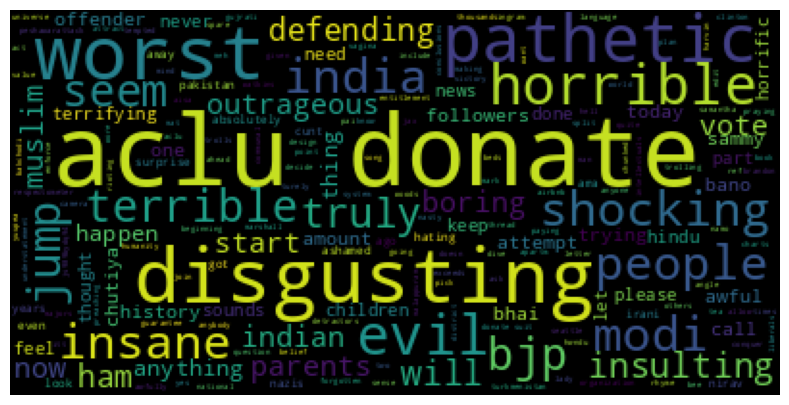

In [51]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion-->> Users are emphasizing more on horrible , pathetic ,insane ,evil , disgusting etc..

*   List item
*   List item



In [52]:
total_comments2=' '.join(comments_positive['Comments'])

(-0.5, 399.5, 199.5, -0.5)

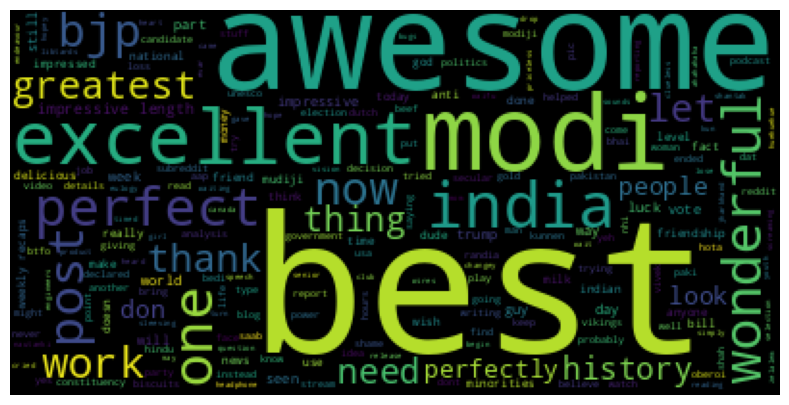

In [53]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Conclusion-->> Users are emphasizing more on awesome , excellent ,best ,perfect etc